In [1]:
import numpy as np
import tensorflow as tf
from MD_AE_tools.models.model_evaluation import one_step_integrate
import matplotlib.pyplot as plt

In [34]:
def fun(x,y):
    return 3*(x**2) + y**2 + 2*x*y
def fx(x,y):
    return 6*x + 2*y
def fy(x,y):
    return 2*y + 2*x

In [62]:
x_list = np.linspace(-3,3,31).astype('float32')
y_list = np.linspace(-2,2,21).astype('float32')
print(np.argwhere(np.abs(y_list-0)<1.19209e-07))
gridx,gridy = np.meshgrid(x_list,y_list)
print(gridx.shape,gridx[:3,:2])

[[10]]
(21, 31) [[-3.  -2.8]
 [-3.  -2.8]
 [-3.  -2.8]]


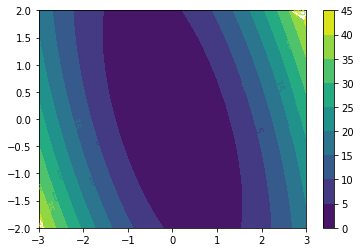

In [64]:
#### true f values

f_true = []
for x in x_list:
    f_perx = []
    for y in y_list:
        f_perx.append(fun(x,y))
    f_true.append(f_perx)
f_true = np.array(f_true)
print
cs = plt.contourf(gridx, gridy, f_true.T, levels=8)
plt.colorbar()
plt.clabel(cs)
plt.show()

f_y0 = []
for x in x_list:
    f_y0.append(fun(x,0))
f_y0 = np.array(f_y0)

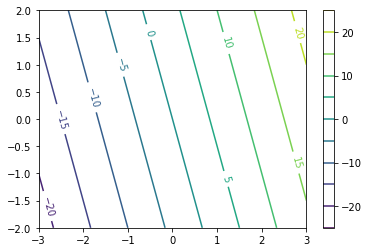

In [70]:
#### analytical df/dx values

dfdx_a = []
for x in x_list:
    f_perx = []
    for y in y_list:
        f_perx.append(fx(x,y))
    dfdx_a.append(f_perx)
dfdx_a = np.array(dfdx_a)



dfdy_a = []
for y in y_list:
    f_pery = []
    for x in x_list:
        f_pery.append(fy(x,y))
    dfdy_a.append(f_pery)
dfdy_a = np.array(dfdy_a)


cs = plt.contour(gridx, gridy, dfdx_a.T, levels=8)
plt.colorbar()
plt.clabel(cs)
plt.show()

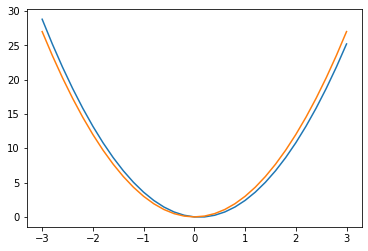

In [66]:
### integrate analytical df/dx, first get f at y=0
f_a_y0 = one_step_integrate(x_list,dfdx_a[:,10],0,0,x_list[1]-x_list[0])
plt.figure()
plt.plot(x_list,f_a_y0)
plt.plot(x_list,f_y0)

In [71]:
print(dfdx_a.shape,dfdy_a.shape)

(31, 21) (21, 31)


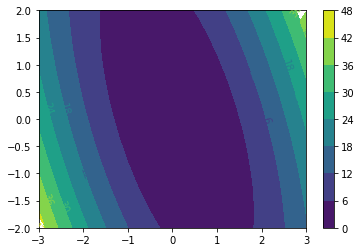

In [76]:
#### integrate from df/dy for all y
f_a = []
for i in range(len(x_list)):
    f_a_pery = one_step_integrate(y_list,dfdy_a[:,i],0,f_a_y0[i],y_list[1]-y_list[0])
    f_a.append(f_a_pery)
f_a = np.array(f_a)


cs = plt.contourf(gridx, gridy, f_a.T, levels=8)
plt.colorbar()
plt.clabel(cs)
plt.show()